In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from scipy.misc import imsave
import os
import shutil
from PIL import Image
import time
import random
import sys

# Exploratory notebook : cxr8 data


Data size = 1024

In [2]:
img_height = 1024
img_width = 1024
img_layer = 1
max_images = 10
batch_size = 1
img_size = img_height * img_width

gray_levels = 255
offset_level = 0

#####  Helper functions

In [3]:
path_A = "/home/sandra/project_GANs/project_GANs_data_mining/cxr8/images_001/images/*.png"
path_B = "/home/sandra/project_GANs/project_GANs_data_mining/cxr8/images_002/images/*.png"

In [12]:
def input_setup(path):

        ''' 
        This function basically setup variables for taking image input.
        '''

        filenames = tf.train.match_filenames_once(path)    
        queue_length = tf.size(filenames)
        
        filename_queue = tf.train.string_input_producer(filenames)

        image_reader = tf.WholeFileReader()
        _, image_file = image_reader.read(filename_queue)

        
        if img_layer > 1 : 
                image = tf.subtract(tf.div(tf.image.resize_images(
                    tf.image.grayscale_to_rgb(tf.image.decode_png(image_file)),
                        [img_height,img_width])
                                   ,gray_levels),offset_level) 
        else :
                image = tf.subtract(tf.div(tf.image.resize_images(
                    tf.image.decode_png(image_file),
                        [img_height,img_width])
                                   ,gray_levels),offset_level) 

        return filename_queue, image, queue_length

def input_read(sess, filename_queue, image, queue_length):


        '''
        It reads the input into from the image folder.
        '''

        # Loading images into the tensors
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)

        num_files = sess.run(queue_length)
        
        print('# files :', num_files)

        _input = np.ones((max_images, batch_size, img_height, img_width, img_layer))

        for i in range(max_images): 
            image_tensor = sess.run(image)
            
            if(image_tensor.size == img_size*batch_size*img_layer):

                _input[i] = image_tensor.reshape((batch_size,img_height, img_width, img_layer))
                
            if i%1 == 0 : print('loading {}% of data'.format((i/max_images)*100))

        coord.request_stop()
        coord.join(threads)
        
        return _input


In [13]:
# Initializing the global variables

def read_input(path):
    
        filename_queue, image, queue_length = input_setup(path)

        init = (tf.global_variables_initializer(), tf.local_variables_initializer())    

        with tf.Session() as sess:
                    sess.run(init)

                    #Read input to nd array
                    inpt = input_read(sess, filename_queue, image, queue_length)
        return inpt

inpt_A = read_input(path_A)
inpt_B = read_input(path_B)

# files : 4999
loading 0.0% of data
loading 10.0% of data
loading 20.0% of data
loading 30.0% of data
loading 40.0% of data
loading 50.0% of data
loading 60.0% of data
loading 70.0% of data
loading 80.0% of data
loading 90.0% of data
# files : 10000
loading 0.0% of data
loading 10.0% of data
loading 20.0% of data
loading 30.0% of data
loading 40.0% of data
loading 50.0% of data
loading 60.0% of data
loading 70.0% of data
loading 80.0% of data
loading 90.0% of data


 data properties

In [14]:
print('input_A shape :', inpt_A.shape)
print('max gray level :', np.max(inpt_A))
print('min gray level :', np.min(inpt_A))

print('input_B shape :', inpt_B.shape)
print('max gray level :', np.max(inpt_B))
print('min gray level :', np.min(inpt_B))

input_A shape : (10, 1, 1024, 1024, 1)
max gray level : 1.0
min gray level : 0.0
input_B shape : (10, 1, 1024, 1024, 1)
max gray level : 1.0
min gray level : 0.0


##### rgb conversion

In [6]:
def convert_to_img(inpt, sess):
        
        if img_layer == 1 :
            
            img = sess.run(tf.image.grayscale_to_rgb((inpt+offset_level)*gray_levels))

        else:

            img = (inpt+offset_level)*gray_levels
            
        return img

In [7]:
init = (tf.global_variables_initializer(), tf.local_variables_initializer())  

with tf.Session() as sess:
    
                sess.run(init)
            
                imgs_A = convert_to_img(inpt_A, sess)
                imgs_B = convert_to_img(inpt_B, sess)

##### Saving image example

In [8]:
num_example = 1
path_to_save = ('/home/sandra/project_GANs/project_GANs_data_mining/test_saving_images/compr='
       +str(img_height)+'num_img='+str(num_example)+'.png')

imsave(path_to_save,(imgs_A[num_example,0,:]).astype(np.uint8))

##### Image plot

In [9]:
import matplotlib.pyplot as plt


from saved images

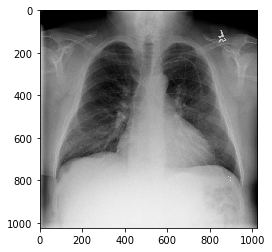

In [10]:
img = plt.imread(path_to_save)
plt.imshow(img)
plt.show()

from notebook data

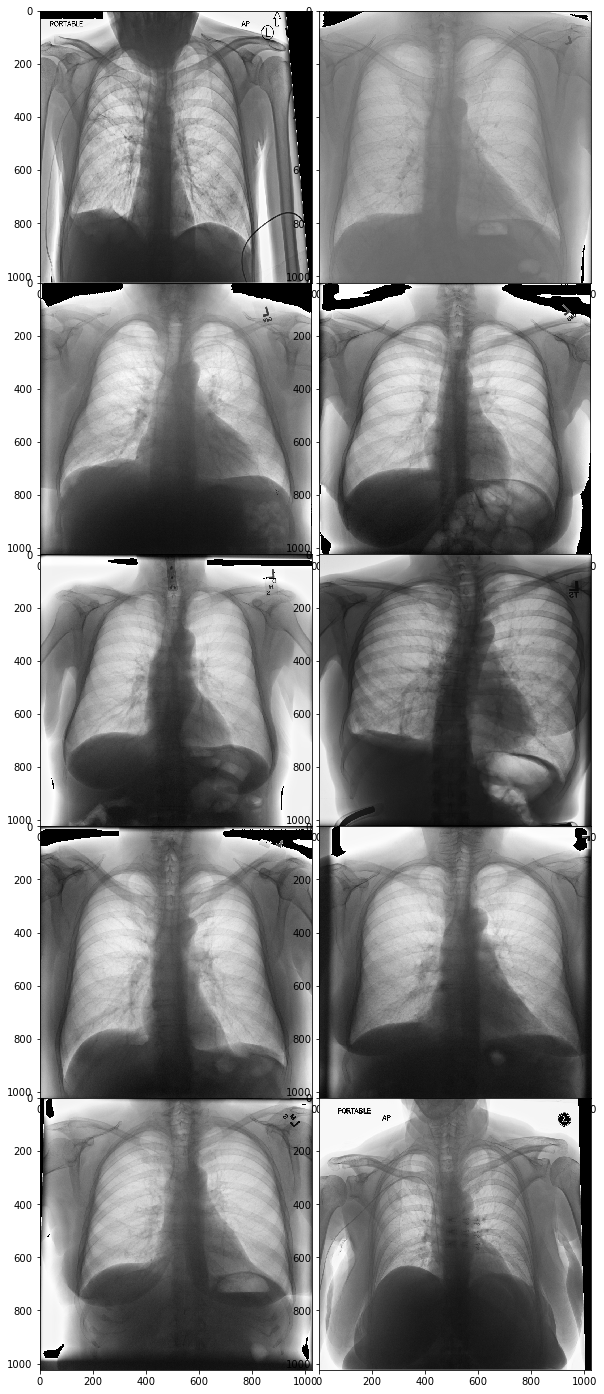

In [11]:
num_imgs=5

fig, axes = plt.subplots(num_imgs, 2, figsize=(10, num_imgs*5))

for i in range(0, num_imgs):
        axes[i,0].imshow(imgs_A[i,0,:])
        axes[i,1].imshow(imgs_B[i,0,:])

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()